In [1]:
#import warnings
#warnings.filter_warning('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
df_churn = pd.read_csv('telecom_churn_data.csv')
df_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [5]:
df_churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [6]:
cols_to_category = ['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_7', 'night_pck_user_8',
                   'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

for col in cols_to_category:
    df_churn[col] = df_churn[col].astype('category')


## Data Cleaning


In [7]:
def calc_null_per():
    null_per = 100 * df_churn.isnull().sum() / df_churn.shape[0]
    above_zero = null_per[null_per > 0]
    return above_zero

In [8]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

### Imputation

In [9]:
cols_to_impute_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
                       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 
                       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 
                       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 
                       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 
                       'night_pck_user_8', 'night_pck_user_9']

for col in cols_to_impute_zero:
    df_churn[col].fillna(0, inplace=True)

In [10]:
calc_null_per()

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

#### Drop high null percentage columns

In [11]:
df_churn = df_churn.drop(
    ['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 
     'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
             axis = 1)

#### Drop irreleant columns

In [12]:
df_churn = df_churn.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                         'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
             axis = 1)

In [13]:
null_cols = calc_null_per() 
null_cols

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t2f_mou_8       5.378054
loc_og_t2f_mou_9       7.745077
loc_og_t

In [14]:
def impute_based_on_zero_per(col):
    zero_per = round(100 * (df_churn[col] == 0).sum() / df_churn.shape[0], 2)
    if zero_per > 95:
        df_churn.drop(col, axis=1, inplace=True)
        return
    if zero_per > 50:
        df_churn[col].fillna(0, inplace=True)
        return
    df_churn[col].fillna(df_churn[col].median(), inplace=True)

In [15]:
for col in null_cols.index:
    if df_churn[col].dtype == 'O':
        df_churn[col].fillna(df_churn[col].mode()[0], inplace=True)
    else:
        impute_based_on_zero_per(col)

In [16]:
calc_null_per()

Series([], dtype: float64)

## Filter High Value Customer

In [17]:
## Calc Average 

In [18]:
df_churn["total_rech_amt_6_7"] = (df_churn["total_rech_amt_6"] + df_churn["total_rech_amt_7"])/2

In [19]:
df_churn["total_rech_amt_6_7"].head(10)

0     307.0
1     229.0
2     241.5
3     270.0
4     273.0
5      60.0
6     360.5
7    1185.0
8     519.0
9     207.5
Name: total_rech_amt_6_7, dtype: float64

In [20]:
df_churn_hvc = df_churn[df_churn['total_rech_amt_6_7'] > df_churn['total_rech_amt_6_7'].quantile(0.7)]

In [21]:
df_churn_hvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 204 entries, mobile_number to total_rech_amt_6_7
dtypes: category(5), float64(164), int64(34), object(1)
memory usage: 45.9+ MB


## Driving Target Column

In [22]:
df_churn_hvc['total_call_usage'] = df_churn_hvc['total_og_mou_9'] + df_churn_hvc['total_ic_mou_9']

<ipython-input-22-401d09660a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_hvc['total_call_usage'] = df_churn_hvc['total_og_mou_9'] + df_churn_hvc['total_ic_mou_9']


In [23]:
df_churn_hvc['total_data_usage'] = df_churn_hvc['vol_2g_mb_9'] + df_churn_hvc['vol_3g_mb_9']

<ipython-input-23-da020bd05e01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_hvc['total_data_usage'] = df_churn_hvc['vol_2g_mb_9'] + df_churn_hvc['vol_3g_mb_9']


In [24]:
df_churn_hvc.head()

mobile_number circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
7      7000701601       109  1069.180  1349.850  3171.480  500.000   
8      7001524846       109   378.721   492.223   137.362  166.787   
13     7002191713       109   492.846   205.671   593.260  322.732   
16     7000875565       109   430.975   299.869   187.894  206.490   
17     7000187447       109   690.008    18.980    25.499  257.583   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  ...  sachet_3g_8  \
7         57.84        54.68        52.29        29.84  ...            0   
8        413.69       351.03        35.08        33.46  ...            0   
13       501.76       108.39       534.24       244.81  ...            0   
16        50.51        74.01        70.61        31.34  ...            0   
17      1185.91         9.28         7.79       558.51  ...            0   

    sachet_3g_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7             0   802       57.74       19.38       18.74         0.0   
8             0   315       21.03      910.65      122.16         0.0   
13            0  2607        0.00        0.00        0.00         0.0   
16            0   511        0.00        2.45       21.89         0.0   
17            0   667        0.00        0.00        0.00         0.0   

    total_rech_amt_6_7  total_call_usage  total_data_usage  
7               1185.0              0.00               0.0  
8                519.0            177.09               0.0  
13               380.0           1077.95               0.0  
16               459.0            590.30               0.0  
17               408.0            718.21               0.0  

[5 rows x 206 columns]

In [25]:
df_churn_hvc['total_usage'] = df_churn_hvc['total_call_usage'] + df_churn_hvc['total_data_usage']


<ipython-input-25-37a2e8f26730>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_hvc['total_usage'] = df_churn_hvc['total_call_usage'] + df_churn_hvc['total_data_usage']


In [26]:
df_churn_hvc['total_usage']

7           0.00
8         177.09
13       1077.95
16        590.30
17        718.21
          ...   
99970     651.59
99974     457.12
99986    2592.97
99988     841.39
99997    4265.02
Name: total_usage, Length: 29979, dtype: float64

In [27]:
df_churn_hvc['cust_churn'] = df_churn_hvc.total_usage.map(lambda x: 1 if x == 0 else 0)

<ipython-input-27-723e9bb765ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn_hvc['cust_churn'] = df_churn_hvc.total_usage.map(lambda x: 1 if x == 0 else 0)


In [28]:
df_churn_hvc.head()

mobile_number circle_id    arpu_6    arpu_7    arpu_8   arpu_9  \
7      7000701601       109  1069.180  1349.850  3171.480  500.000   
8      7001524846       109   378.721   492.223   137.362  166.787   
13     7002191713       109   492.846   205.671   593.260  322.732   
16     7000875565       109   430.975   299.869   187.894  206.490   
17     7000187447       109   690.008    18.980    25.499  257.583   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  ...   aon  aug_vbc_3g  \
7         57.84        54.68        52.29        29.84  ...   802       57.74   
8        413.69       351.03        35.08        33.46  ...   315       21.03   
13       501.76       108.39       534.24       244.81  ...  2607        0.00   
16        50.51        74.01        70.61        31.34  ...   511        0.00   
17      1185.91         9.28         7.79       558.51  ...   667        0.00   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_amt_6_7  total_call_usage  \
7        19.38       18.74         0.0              1185.0              0.00   
8       910.65      122.16         0.0               519.0            177.09   
13        0.00        0.00         0.0               380.0           1077.95   
16        2.45       21.89         0.0               459.0            590.30   
17        0.00        0.00         0.0               408.0            718.21   

    total_data_usage  total_usage  cust_churn  
7                0.0         0.00           1  
8                0.0       177.09           0  
13               0.0      1077.95           0  
16               0.0       590.30           0  
17               0.0       718.21           0  

[5 rows x 208 columns]

### Drop 9th month data

In [29]:
cols_to_drop = list(filter(lambda x: "_9" in x, df_churn_hvc.columns))
df_churn_hvc = df_churn_hvc.drop(cols_to_drop, axis=1)

In [30]:
cols_to_drop = list(filter(lambda x: "_8" in x, df_churn_hvc.columns))
df_churn_hvc = df_churn_hvc.drop(cols_to_drop, axis=1)

### Drop Highly Skewed Columns

In [31]:
cat_columns = df_churn_hvc.select_dtypes(['object', 'category']).columns
cat_columns

Index(['circle_id', 'night_pck_user_6', 'night_pck_user_7'], dtype='object')

In [32]:
# print value count in each column
for col in cat_columns:
    print(col + ':')
    print(round(100 * df_churn_hvc[col].value_counts(normalize=True), 2))
    print('-------------')

circle_id:
109    100.0
Name: circle_id, dtype: float64
-------------
night_pck_user_6:
0.0    98.96
1.0     1.04
Name: night_pck_user_6, dtype: float64
-------------
night_pck_user_7:
0.0    99.01
1.0     0.99
Name: night_pck_user_7, dtype: float64
-------------


In [33]:
# drop circle_id
df_churn_hvc = df_churn_hvc.drop(['circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1)

## Outlier Treatment

In [34]:
shape_df = pd.DataFrame({'skew': df_churn_hvc.skew(), 'kurt': df_churn_hvc.kurt()})
shape_df.head

<bound method NDFrame.head of                          skew         kurt
mobile_number       -0.025704    -1.166016
arpu_6              13.344432   579.532168
arpu_7              19.344429  1151.062480
onnet_mou_6          3.908420    25.758600
onnet_mou_7          4.122414    30.154619
offnet_mou_6         3.480565    21.752558
offnet_mou_7         3.728853    26.240919
roam_ic_mou_6       11.562719   220.004671
roam_ic_mou_7       16.889585   497.892089
roam_og_mou_6        8.970096   129.081456
roam_og_mou_7        8.968175   114.482314
loc_og_t2t_mou_6     9.096263   128.358383
loc_og_t2t_mou_7    10.204818   166.320470
loc_og_t2m_mou_6     4.210632    33.828439
loc_og_t2m_mou_7     3.974360    30.861278
loc_og_t2f_mou_6    16.900925   704.976110
loc_og_t2f_mou_7    15.477118   535.713766
loc_og_t2c_mou_6    17.784396   598.331584
loc_og_t2c_mou_7    25.213176  1076.167488
loc_og_mou_6         4.399239    43.632881
loc_og_mou_7         4.374074    37.982165
std_og_t2t_mou_6     4.3

In [35]:
shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]

skew         kurt
arpu_7              19.344429  1151.062480
roam_ic_mou_7       16.889585   497.892089
loc_og_t2f_mou_6    16.900925   704.976110
loc_og_t2f_mou_7    15.477118   535.713766
loc_og_t2c_mou_6    17.784396   598.331584
loc_og_t2c_mou_7    25.213176  1076.167488
std_og_t2f_mou_6    16.516813   439.852629
std_og_t2f_mou_7    17.102508   423.375150
isd_og_mou_6        86.867937  9981.548953
isd_og_mou_7        83.469192  8838.347896
spl_og_mou_6        16.103366   545.178065
spl_og_mou_7        17.770458   634.492440
std_ic_t2t_mou_6    25.370718  1129.718811
std_ic_t2t_mou_7    29.976142  1476.664398
std_ic_t2f_mou_6    29.517601  1387.717149
std_ic_t2f_mou_7    27.841825  1160.207239
spl_ic_mou_6        37.533594  3570.344688
spl_ic_mou_7        72.352980  7427.087488
isd_ic_mou_6        17.787891   589.891444
isd_ic_mou_7        21.731666   844.338497
ic_others_6         58.590112  4763.490020
ic_others_7         47.891269  3565.632526
total_rech_amt_7    17.739946   959.817886
sep_vbc_3g          18.305443   564.984735
total_rech_amt_6_7  21.226967  1263.635020

In [36]:
outlier_df = shape_df[(shape_df['skew'].abs() > 15 ) & (shape_df['kurt'].abs() > 100)]
for col in outlier_df.index:
    skew = shape_df.loc[col]['skew']
    if skew > 0:
        val = df_churn_hvc[col].quantile(0.999)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] > val, val ,df_churn_hvc[col])
    else:
        val = df_churn_hvc[col].quantile(0.001)
        df_churn_hvc[col] = np.where(df_churn_hvc[col] < val, val ,df_churn_hvc[col])

## EDA

In [37]:
df_churn_hvc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 104 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mobile_number       29979 non-null  int64  
 1   arpu_6              29979 non-null  float64
 2   arpu_7              29979 non-null  float64
 3   onnet_mou_6         29979 non-null  float64
 4   onnet_mou_7         29979 non-null  float64
 5   offnet_mou_6        29979 non-null  float64
 6   offnet_mou_7        29979 non-null  float64
 7   roam_ic_mou_6       29979 non-null  float64
 8   roam_ic_mou_7       29979 non-null  float64
 9   roam_og_mou_6       29979 non-null  float64
 10  roam_og_mou_7       29979 non-null  float64
 11  loc_og_t2t_mou_6    29979 non-null  float64
 12  loc_og_t2t_mou_7    29979 non-null  float64
 13  loc_og_t2m_mou_6    29979 non-null  float64
 14  loc_og_t2m_mou_7    29979 non-null  float64
 15  loc_og_t2f_mou_6    29979 non-null  float64
 16  loc

In [38]:
df_churn_hvc.describe()

mobile_number        arpu_6        arpu_7   onnet_mou_6   onnet_mou_7  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    585.997508    296.597992    304.918683   
std     6.846594e+05    442.848876    378.029730    460.722063    481.771118   
min     7.000000e+09  -2258.709000  -2014.045000      0.000000      0.000000   
25%     7.000641e+09    364.352500    365.235000     41.170000     41.045000   
50%     7.001232e+09    495.951000    493.781000    125.890000    125.560000   
75%     7.001814e+09    704.184500    700.986000    353.500000    360.360000   
max     7.002411e+09  27731.088000   4115.855306   7376.710000   8157.780000   

       offnet_mou_6  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  \
count  29979.000000  29979.000000   29979.000000   29979.000000   
mean     419.142919    425.030619      17.428073      13.047682   
std      469.973639    485.988101      79.192826      64.423794   
min        0.000000      0.000000       0.000000       0.000000   
25%      137.340000    135.690000       0.000000       0.000000   
50%      282.260000    282.040000       0.000000       0.000000   
75%      523.625000    532.905000       0.000000       0.000000   
max     8362.360000   9667.130000    2613.310000    1058.589260   

       roam_og_mou_6  ...           aon    aug_vbc_3g    jul_vbc_3g  \
count   29979.000000  ...  29979.000000  29979.000000  29979.000000   
mean       29.348362  ...   1264.158911    129.482436    135.225368   
std       118.629898  ...    975.181038    390.625027    408.218570   
min         0.000000  ...    180.000000      0.000000      0.000000   
25%         0.000000  ...    480.000000      0.000000      0.000000   
50%         0.000000  ...    914.000000      0.000000      0.000000   
75%         0.000000  ...   1923.500000      1.600000      2.025000   
max      3775.110000  ...   4321.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  total_rech_amt_6_7  total_call_usage  \
count  29979.000000  29979.000000        29979.000000      29979.000000   
mean     121.450911      6.196224          693.027823        840.580894   
std      389.910814     39.986160          388.521808        808.682928   
min        0.000000      0.000000          369.000000          0.000000   
25%        0.000000      0.000000          450.000000        290.070000   
50%        0.000000      0.000000          569.000000        667.500000   
75%        0.000000      0.000000          796.000000       1150.325000   
max    11166.210000    648.025680         4281.704000      11444.620000   

       total_data_usage   total_usage   cust_churn  
count      29979.000000  29979.000000  29979.00000  
mean         333.955764   1174.536658      0.08636  
std          937.888180   1232.899316      0.28090  
min            0.000000      0.000000      0.00000  
25%            0.000000    425.830000      0.00000  
50%            0.000000    893.470000      0.00000  
75%          240.995000   1564.350000      0.00000  
max        39221.270000  39227.890000      1.00000  

[8 rows x 104 columns]

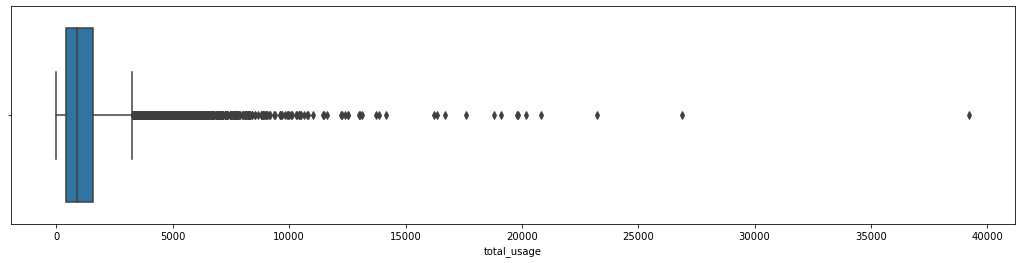

In [39]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['total_usage'])
plt.show()

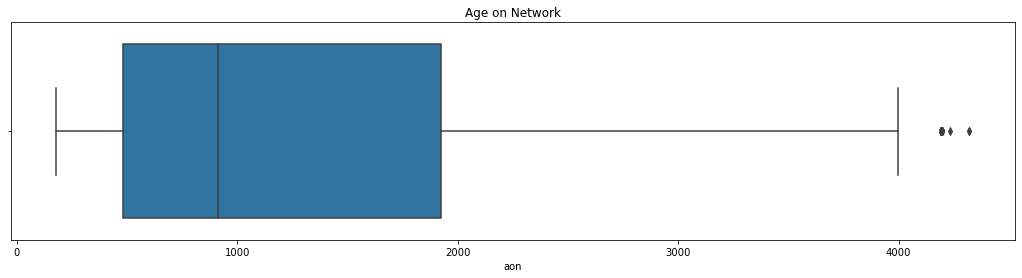

In [40]:
plt.figure(figsize=(18,4))
sns.boxplot(df_churn_hvc['aon'])
plt.title('Age on Network')
plt.show()

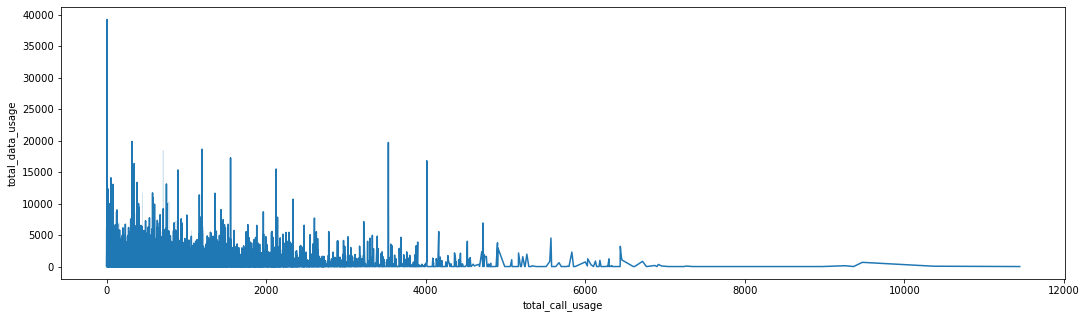

In [41]:
plt.figure(figsize=(18, 5))
sns.lineplot(x='total_call_usage', y='total_data_usage', data=df_churn_hvc)
plt.show()

In [42]:
mobile_df = df_churn_hvc.pop('mobile_number')

## Train Test Split

In [43]:
y = df_churn_hvc.pop('cust_churn')
X = df_churn_hvc

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(20985, 102)

In [46]:
X_test.shape

(8994, 102)

In [47]:
y_train.shape

(20985,)

In [48]:
y_test.shape

(8994,)

## Correlation

In [49]:
corr = X_train.corr()
corr

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  \
arpu_6              1.000000  0.540661     0.310749     0.160866   
arpu_7              0.540661  1.000000     0.177304     0.333228   
onnet_mou_6         0.310749  0.177304     1.000000     0.726925   
onnet_mou_7         0.160866  0.333228     0.726925     1.000000   
offnet_mou_6        0.478862  0.300345     0.012142    -0.028641   
offnet_mou_7        0.267503  0.493274    -0.046670     0.006644   
roam_ic_mou_6       0.111201  0.083819     0.007301     0.023726   
roam_ic_mou_7       0.073429  0.117082     0.014393    -0.001902   
roam_og_mou_6       0.188939  0.139059     0.059343     0.066861   
roam_og_mou_7       0.133571  0.209905     0.061317     0.059440   
loc_og_t2t_mou_6    0.137980  0.079393     0.450767     0.322291   
loc_og_t2t_mou_7    0.093376  0.149169     0.340231     0.445550   
loc_og_t2m_mou_6    0.288521  0.178115    -0.034274    -0.073021   
loc_og_t2m_mou_7    0.180033  0.292018    -0.075240    -0.055100   
loc_og_t2f_mou_6    0.125760  0.102890    -0.067969    -0.076628   
loc_og_t2f_mou_7    0.089621  0.136262    -0.076602    -0.071429   
loc_og_t2c_mou_6    0.053486  0.010877     0.047767     0.031093   
loc_og_t2c_mou_7    0.010178  0.062984     0.030800     0.067682   
loc_og_mou_6        0.282581  0.172787     0.256814     0.150593   
loc_og_mou_7        0.183050  0.294182     0.171125     0.253486   
std_og_t2t_mou_6    0.250136  0.139498     0.847959     0.615923   
std_og_t2t_mou_7    0.115713  0.271181     0.607152     0.853277   
std_og_t2m_mou_6    0.281327  0.182844     0.039156     0.013578   
std_og_t2m_mou_7    0.132441  0.325421    -0.005486     0.041512   
std_og_t2f_mou_6    0.056718  0.038674    -0.043326    -0.046134   
std_og_t2f_mou_7    0.041997  0.069243    -0.045807    -0.039310   
std_og_mou_6        0.361408  0.219431     0.597157     0.423356   
std_og_mou_7        0.169338  0.406278     0.402476     0.599812   
isd_og_mou_6        0.346222  0.200390    -0.037529    -0.035339   
isd_og_mou_7        0.260880  0.295770    -0.042505    -0.035426   
spl_og_mou_6        0.115487  0.050437     0.092746     0.057095   
spl_og_mou_7        0.050667  0.116339     0.065550     0.112371   
og_others_6         0.091373  0.017657     0.086693     0.037569   
total_og_mou_6      0.527285  0.313191     0.696385     0.474686   
total_og_mou_7      0.283895  0.557911     0.468818     0.699361   
loc_ic_t2t_mou_6    0.068306  0.033757     0.064321     0.025552   
loc_ic_t2t_mou_7    0.037059  0.069546     0.048730     0.054159   
loc_ic_t2m_mou_6    0.156942  0.089693    -0.073462    -0.109015   
loc_ic_t2m_mou_7    0.106398  0.156400    -0.093807    -0.084220   
loc_ic_t2f_mou_6    0.043312  0.024875    -0.046525    -0.053261   
loc_ic_t2f_mou_7    0.025734  0.039743    -0.048618    -0.043149   
loc_ic_mou_6        0.151314  0.084214    -0.025901    -0.071457   
loc_ic_mou_7        0.097793  0.151256    -0.046439    -0.036240   
std_ic_t2t_mou_6    0.089963  0.064217     0.147487     0.095009   
std_ic_t2t_mou_7    0.043419  0.103797     0.087182     0.129520   
std_ic_t2m_mou_6    0.080143  0.051583    -0.011034    -0.035862   
std_ic_t2m_mou_7    0.043915  0.105280    -0.028737    -0.013272   
std_ic_t2f_mou_6    0.031036  0.036381    -0.035392    -0.034489   
std_ic_t2f_mou_7    0.024403  0.050961    -0.039321    -0.035961   
std_ic_mou_6        0.103110  0.073581     0.054243     0.014258   
std_ic_mou_7        0.054976  0.128290     0.017314     0.046984   
total_ic_mou_6      0.192735  0.110828    -0.005738    -0.063608   
total_ic_mou_7      0.116916  0.202887    -0.039403    -0.016596   
spl_ic_mou_6        0.011894 -0.024951     0.033002     0.007656   
spl_ic_mou_7       -0.066049 -0.010008    -0.051238     0.000759   
isd_ic_mou_6        0.101778  0.052884    -0.031429    -0.040672   
isd_ic_mou_7        0.063797  0.087840    -0.036931    -0.033435   
ic_others_6         0.029215  0.007631    -0.010110    -0.023108   
ic_others_

In [50]:
#plt.figure(figsize=(200,100))
#sns.heatmap(corr, annot=True)
#plt.show()

In [51]:
threshold = 0.8
corr_matrix = corr
iters = range(len(corr_matrix.columns) - 1)
col1_list = []
col2_list = []
val_list = []

# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)
        
        # If correlation exceeds the threshold
        if val[0][0] >= threshold:
            col1 = col.values[0]
            col2 = row.values[0]
            if ((col2 not in col1_list) or (col1 not in col2_list)):
                col1_list.append(col1)
                col2_list.append(col2)
                val_list.append(val[0][0])

pd.DataFrame({'col1': col1_list, 'col2': col2_list, 'val': val_list})

col1                col2       val
0     std_og_t2t_mou_6         onnet_mou_6  0.847959
1     std_og_t2t_mou_7         onnet_mou_7  0.853277
2     std_og_t2m_mou_6        offnet_mou_6  0.825924
3     std_og_t2m_mou_7        offnet_mou_7  0.849289
4       total_og_mou_6        std_og_mou_6  0.818499
5       total_og_mou_7        std_og_mou_7  0.837721
6         loc_ic_mou_6    loc_ic_t2m_mou_6  0.847856
7         loc_ic_mou_7    loc_ic_t2m_mou_7  0.830215
8         loc_ic_mou_7        loc_ic_mou_6  0.810313
9         std_ic_mou_6    std_ic_t2m_mou_6  0.842907
10        std_ic_mou_7    std_ic_t2m_mou_7  0.824602
11      total_ic_mou_6        loc_ic_mou_6  0.896822
12      total_ic_mou_7        loc_ic_mou_7  0.880405
13    total_rech_amt_6              arpu_6  0.930221
14    total_rech_amt_7              arpu_7  0.909784
15     count_rech_2g_6   total_rech_data_6  0.888903
16     count_rech_2g_7   total_rech_data_7  0.886717
17  av_rech_amt_data_6     max_rech_data_6  0.817686
18  av_rech_amt_data_7     max_rech_data_7  0.832316
19         vol_3g_mb_7  av_rech_amt_data_7  0.807220
20           arpu_3g_6  av_rech_amt_data_6  0.853016
21           arpu_3g_7  av_rech_amt_data_7  0.826284
22           arpu_3g_7         vol_3g_mb_7  0.809907
23           arpu_2g_6  av_rech_amt_data_6  0.885593
24           arpu_2g_6           arpu_3g_6  0.934004
25           arpu_2g_7  av_rech_amt_data_7  0.864819
26           arpu_2g_7         vol_3g_mb_7  0.813734
27           arpu_2g_7           arpu_3g_7  0.930129
28         sachet_2g_6   total_rech_data_6  0.875345
29         sachet_2g_6     count_rech_2g_6  0.976988
30         sachet_2g_7   total_rech_data_7  0.876254
31         sachet_2g_7     count_rech_2g_7  0.980151
32        monthly_3g_6           arpu_3g_6  0.822626
33        monthly_3g_6           arpu_2g_6  0.841304
34        monthly_3g_7           arpu_3g_7  0.833327
35        monthly_3g_7           arpu_2g_7  0.856547
36         sachet_3g_6     count_rech_3g_6  0.825784
37         sachet_3g_7     count_rech_3g_7  0.844427
38  total_rech_amt_6_7              arpu_6  0.808014
39  total_rech_amt_6_7              arpu_7  0.858383
40  total_rech_amt_6_7    total_rech_amt_6  0.812091
41  total_rech_amt_6_7    total_rech_amt_7  0.855063

### Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_train.head()

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0  0.193794  0.269377    -0.290499    -0.320259      0.537934      0.875792   
1 -0.493517 -0.489996    -0.515091    -0.390316     -0.197501     -0.388941   
2 -0.379638 -0.020756    -0.573413    -0.607373     -0.680955     -0.671479   
3  0.060972 -0.636170     0.869262    -0.053817     -0.172045     -0.340572   
4 -0.447112 -0.772196    -0.303153    -0.529991     -0.361316     -0.427554   

   roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  ...  \
0      -0.226254       -0.20692      -0.244607      -0.223138  ...   
1      -0.226254       -0.20692      -0.244607      -0.223138  ...   
2      -0.226254       -0.20692      -0.244607      -0.223138  ...   
3      -0.226254       -0.03237      -0.244607       0.169382  ...   
4      -0.226254       -0.20692      -0.244607      -0.223138  ...   

   sachet_3g_7       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0    -0.156336  0.887749   -0.036233    0.085971   -0.317221    -0.15326   
1     0.913695 -0.998614   -0.326818   -0.331929   -0.317221    -0.15326   
2    -0.156336  0.881588   -0.326818   -0.331929   -0.317221    -0.15326   
3    -0.156336 -0.081618   -0.326818   -0.331929   -0.317221    -0.15326   
4    -0.156336 -0.417405   -0.326818   -0.331929   -0.317221    -0.15326   

   total_rech_amt_6_7  total_call_usage  total_data_usage  total_usage  
0            0.069094          0.315234         -0.067553     0.153404  
1           -0.693728         -0.238099         -0.349486    -0.424545  
2           -0.401121         -0.682034          0.283377    -0.226143  
3           -0.309123         -0.269888         -0.349486    -0.445265  
4           -0.746116          0.110964         -0.349486    -0.197028  

[5 rows x 102 columns]

In [53]:
pd.DataFrame(X_train).head()

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0  0.193794  0.269377    -0.290499    -0.320259      0.537934      0.875792   
1 -0.493517 -0.489996    -0.515091    -0.390316     -0.197501     -0.388941   
2 -0.379638 -0.020756    -0.573413    -0.607373     -0.680955     -0.671479   
3  0.060972 -0.636170     0.869262    -0.053817     -0.172045     -0.340572   
4 -0.447112 -0.772196    -0.303153    -0.529991     -0.361316     -0.427554   

   roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  ...  \
0      -0.226254       -0.20692      -0.244607      -0.223138  ...   
1      -0.226254       -0.20692      -0.244607      -0.223138  ...   
2      -0.226254       -0.20692      -0.244607      -0.223138  ...   
3      -0.226254       -0.03237      -0.244607       0.169382  ...   
4      -0.226254       -0.20692      -0.244607      -0.223138  ...   

   sachet_3g_7       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0    -0.156336  0.887749   -0.036233    0.085971   -0.317221    -0.15326   
1     0.913695 -0.998614   -0.326818   -0.331929   -0.317221    -0.15326   
2    -0.156336  0.881588   -0.326818   -0.331929   -0.317221    -0.15326   
3    -0.156336 -0.081618   -0.326818   -0.331929   -0.317221    -0.15326   
4    -0.156336 -0.417405   -0.326818   -0.331929   -0.317221    -0.15326   

   total_rech_amt_6_7  total_call_usage  total_data_usage  total_usage  
0            0.069094          0.315234         -0.067553     0.153404  
1           -0.693728         -0.238099         -0.349486    -0.424545  
2           -0.401121         -0.682034          0.283377    -0.226143  
3           -0.309123         -0.269888         -0.349486    -0.445265  
4           -0.746116          0.110964         -0.349486    -0.197028  

[5 rows x 102 columns]

In [54]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)
X_test.head()

arpu_6    arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
0  0.821138  2.618213    -0.405377    -0.378983      0.870322      2.206561   
1 -0.308035 -0.751047    -0.206955    -0.345927     -0.252536     -0.424710   
2 -0.315165 -0.314813    -0.368900    -0.436175     -0.703514     -0.694148   
3 -0.536465 -1.098116    -0.520450    -0.598034     -0.428191     -0.607809   
4 -0.583254 -0.571512     0.067178    -0.108847     -0.334824      0.043895   

   roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  ...  \
0      -0.226254       -0.20692      -0.244607      -0.223138  ...   
1      -0.226254       -0.20692      -0.244607      -0.223138  ...   
2      -0.226121       -0.20692      -0.242050      -0.223138  ...   
3      -0.226254       -0.20692      -0.244607      -0.223138  ...   
4      -0.226254       -0.20692      -0.244607      -0.223138  ...   

   sachet_3g_7       aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0    -0.156336  1.352922   -0.326818   -0.331929   -0.317221    -0.15326   
1    -0.156336  1.146521   -0.326818   -0.331929   -0.317221    -0.15326   
2    -0.156336 -0.253106    0.465216   -0.331929    0.889543    -0.15326   
3    -0.156336 -0.774756   -0.326818   -0.331929   -0.317221    -0.15326   
4    -0.156336 -0.674123   -0.326818   -0.331929   -0.317221    -0.15326   

   total_rech_amt_6_7  total_call_usage  total_data_usage  total_usage  
0            2.394615          2.249362          0.180658     1.605355  
1           -0.711617         -1.010279         -0.349486    -0.927847  
2           -0.356400         -0.474308         -0.349486    -0.578504  
3           -0.642618         -0.631136         -0.349486    -0.680724  
4           -0.715450         -0.900422         -0.349486    -0.856243  

[5 rows x 102 columns]

# Modelling

## Intrepretable Model - Logistic Regression

In [55]:
df_churn_hvc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 102 columns):
 #   Column              Dtype  
---  ------              -----  
 0   arpu_6              float64
 1   arpu_7              float64
 2   onnet_mou_6         float64
 3   onnet_mou_7         float64
 4   offnet_mou_6        float64
 5   offnet_mou_7        float64
 6   roam_ic_mou_6       float64
 7   roam_ic_mou_7       float64
 8   roam_og_mou_6       float64
 9   roam_og_mou_7       float64
 10  loc_og_t2t_mou_6    float64
 11  loc_og_t2t_mou_7    float64
 12  loc_og_t2m_mou_6    float64
 13  loc_og_t2m_mou_7    float64
 14  loc_og_t2f_mou_6    float64
 15  loc_og_t2f_mou_7    float64
 16  loc_og_t2c_mou_6    float64
 17  loc_og_t2c_mou_7    float64
 18  loc_og_mou_6        float64
 19  loc_og_mou_7        float64
 20  std_og_t2t_mou_6    float64
 21  std_og_t2t_mou_7    float64
 22  std_og_t2m_mou_6    float64
 23  std_og_t2m_mou_7    float64
 24  std_og_t2f_mou_6    float64

In [56]:
df_churn_hvc.select_dtypes(['object', 'category']).columns

Index([], dtype='object')

**No categorical column is there so One Hot Encoding is not required**

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)

### RFE

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)
rfe.fit(X_train, y_train)

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['onnet_mou_6', 'offnet_mou_6', 'total_og_mou_6', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'total_ic_mou_7',
       'isd_ic_mou_7', 'sep_vbc_3g', 'total_call_usage', 'total_data_usage',
       'total_usage'],
      dtype='object')

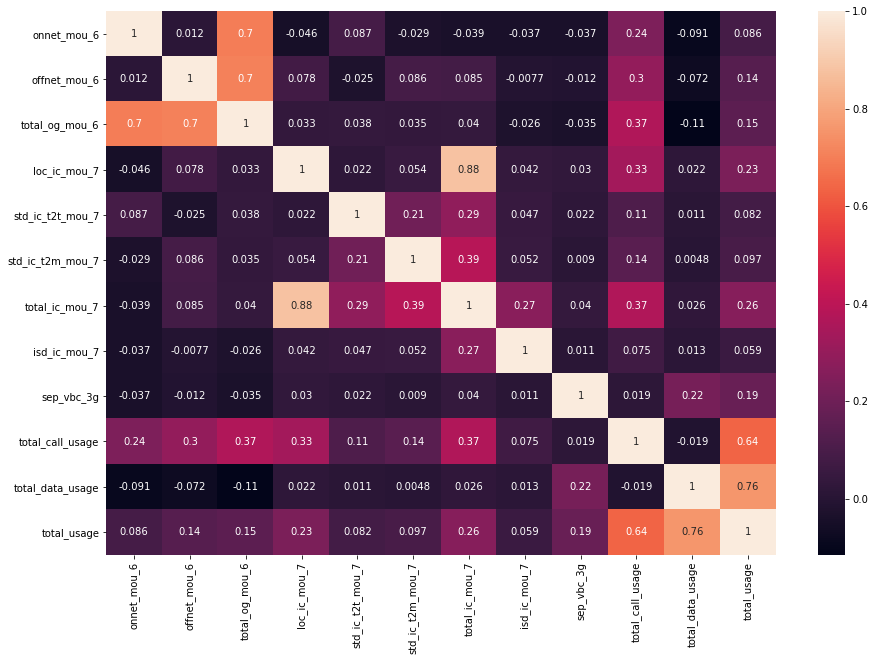

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.loc[:,cols].corr(), annot=True)
plt.show()

In [61]:
## Drop corerelated columns
cols_to_drop = ['count_rech_2g_7', 'std_og_mou_6', 'total_usage']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

In [62]:
logreg = LogisticRegression(class_weight={0:0.4, 1:0.6}, random_state=42)
model = logreg.fit(X_train, y_train)

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
y_train_pred_prob = model.predict_proba(X_train)
y_train_pred_prob

array([[1.00000000e+00, 1.29084488e-10],
       [9.99990997e-01, 9.00316887e-06],
       [9.99787636e-01, 2.12364341e-04],
       ...,
       [9.99999933e-01, 6.73511041e-08],
       [1.00000000e+00, 6.39803999e-15],
       [9.99999985e-01, 1.50611867e-08]])

In [64]:
model.classes_

array([0, 1], dtype=int64)

In [65]:
y_train_pred_prob = pd.Series(y_train_pred_prob[:,1])

In [66]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
#print(accuracy_score(y_test, y_pred))

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

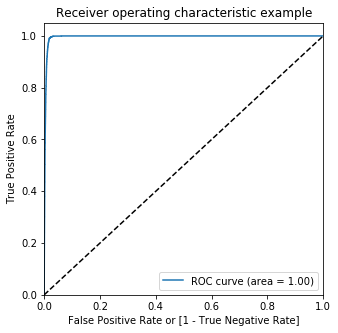

In [68]:
draw_roc(y_train, y_train_pred_prob)

### Finding Optimal Cutoff Point

In [69]:
# Let's create columns with different probability cutoffs 
pred_prob_df = pd.DataFrame()
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    pred_prob_df[i]= y_train_pred_prob.map(lambda x: 1 if x > i else 0)
pred_prob_df.head()

0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0    1    0    0    0    0    0    0    0    0    0
1    1    0    0    0    0    0    0    0    0    0
2    1    0    0    0    0    0    0    0    0    0
3    1    0    0    0    0    0    0    0    0    0
4    1    0    0    0    0    0    0    0    0    0

In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train, pred_prob_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085871  1.000000  0.000000
0.1   0.1  0.940100  1.000000  0.934473
0.2   0.2  0.953729  0.999445  0.949434
0.3   0.3  0.962926  0.999445  0.959495
0.4   0.4  0.970217  0.998890  0.967523
0.5   0.5  0.976936  0.996115  0.975134
0.6   0.6  0.983083  0.982242  0.983162
0.7   0.7  0.982654  0.892897  0.991086
0.8   0.8  0.950060  0.440622  0.997915
0.9   0.9  0.920515  0.076582  0.999791


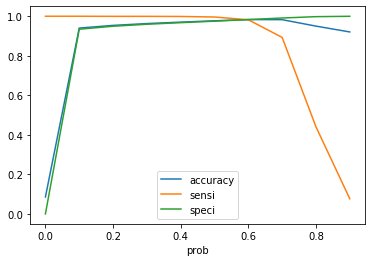

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [72]:
cutoff = 0.7
y_train_pred = y_train_pred_prob.map( lambda x: 1 if x > cutoff else 0)
y_train_pred

0        0
1        0
2        0
3        0
4        0
        ..
20980    0
20981    0
20982    0
20983    0
20984    0
Length: 20985, dtype: int64

In [73]:
accuracy_score(y_train, y_train_pred)

0.982654276864427

In [74]:
confusion2 = confusion_matrix(y_train, y_train_pred)
confusion2

array([[19012,   171],
       [  193,  1609]], dtype=int64)

In [75]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.892896781354051

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.9910858572694573

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.008914142730542668


In [79]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9039325842696629


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9899505337151784


### Precision and Recall

In [81]:
confusion = confusion_matrix(y_train, y_train_pred)
confusion

array([[19012,   171],
       [  193,  1609]], dtype=int64)

#### Precision

In [82]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9039325842696629

#### Recall

In [83]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.892896781354051

#### Precision and recall tradeoff


In [84]:
from sklearn.metrics import precision_recall_curve

In [85]:
p, r, thresholds = precision_recall_curve(y_train, y_train_pred)

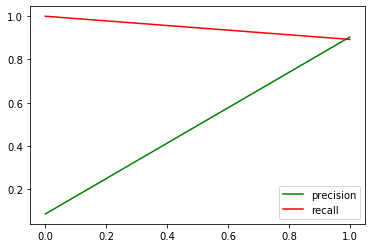

In [86]:
plt.plot(thresholds, p[:-1], "g-", label='precision')
plt.plot(thresholds, r[:-1], "r-", label='recall')
plt.legend()
plt.show()

In [87]:
y.value_counts()

0    27390
1     2589
Name: cust_churn, dtype: int64

### Making predictions on the test set

In [88]:
y_test_pred_prob = model.predict_proba(X_test)
y_test_pred_prob

array([[1.00000000e+00, 7.17289473e-25],
       [3.62863406e-01, 6.37136594e-01],
       [9.99843392e-01, 1.56608495e-04],
       ...,
       [9.99999165e-01, 8.35397624e-07],
       [9.99919153e-01, 8.08471878e-05],
       [9.99997803e-01, 2.19689832e-06]])

In [89]:
y_test_pred_prob = pd.Series(y_test_pred_prob[:,1])

In [90]:
y_test_pred = y_test_pred_prob.map(lambda x: 1 if x > cutoff else 0)

In [91]:
accuracy_score(y_test, y_test_pred)

0.9768734712030243

In [92]:
confusion2 = confusion_matrix(y_test, y_test_pred)
confusion2

array([[8117,   90],
       [ 118,  669]], dtype=int64)

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8500635324015248

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.9890337516753991

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01096624832460095


In [97]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8814229249011858


In [98]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9856709168184578


### Precision and Recall

In [99]:
confusion = confusion_matrix(y_test, y_test_pred)
confusion

array([[8117,   90],
       [ 118,  669]], dtype=int64)

#### Precision

In [100]:
ps = precision_score(y_test, y_test_pred)
ps

0.8814229249011858

#### Recall

In [101]:
rs = recall_score(y_test, y_test_pred)
rs

0.8500635324015248

#### F1 Score - Harmonic mean between Precision and Recall

In [102]:
F1_score = (float(2)*rs*ps)/(rs + ps)
F1_score

0.8654592496765846

## PCA

In [103]:
from sklearn.decomposition import PCA, IncrementalPCA

In [104]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
pca.components_

array([[ 8.59002826e-02,  9.48035835e-02, -4.78904936e-02, ...,
         1.03900151e-01, -8.02185966e-03,  1.90801264e-01],
       [ 1.88856341e-01,  2.00016656e-01,  1.20820105e-01, ...,
         2.27629255e-01,  1.99506126e-01, -2.36661589e-02],
       [ 1.23921771e-01,  1.52380281e-01,  1.54356081e-01, ...,
         1.60091590e-01,  2.00470021e-02,  3.10571710e-02],
       ...,
       [ 0.00000000e+00, -2.57406040e-16,  3.33257663e-16, ...,
         2.57588341e-16,  2.06323417e-17,  1.87931931e-18],
       [ 0.00000000e+00,  1.86305291e-16,  8.09231612e-15, ...,
         1.20596196e-16, -9.03233616e-17,  7.06794359e-17],
       [ 0.00000000e+00,  5.35207473e-17, -5.19699757e-15, ...,
         3.12560276e-18,  3.81817808e-18,  8.53526599e-17]])

In [106]:
# checking explained variance ratio
pca.explained_variance_ratio_

array([1.25583239e-01, 9.21933472e-02, 7.30505704e-02, 5.25475118e-02,
       4.28409238e-02, 3.53099079e-02, 3.10218589e-02, 2.72567035e-02,
       2.63673881e-02, 2.54737126e-02, 2.51040547e-02, 2.28703264e-02,
       2.19861318e-02, 1.92679966e-02, 1.81894732e-02, 1.80242223e-02,
       1.68799594e-02, 1.62707881e-02, 1.57856530e-02, 1.37664557e-02,
       1.27344477e-02, 1.22324820e-02, 1.19006025e-02, 1.08840376e-02,
       1.03905664e-02, 1.00623560e-02, 9.75757378e-03, 9.69083582e-03,
       8.97647946e-03, 8.93853363e-03, 8.71745444e-03, 8.43561737e-03,
       8.26180739e-03, 8.11511246e-03, 7.71572811e-03, 6.67276339e-03,
       6.46290403e-03, 6.39949980e-03, 5.99494578e-03, 5.93159143e-03,
       5.74024430e-03, 5.65460070e-03, 5.46653072e-03, 5.36497572e-03,
       4.74697520e-03, 4.61579145e-03, 4.39764576e-03, 4.08862919e-03,
       3.72426208e-03, 3.70801509e-03, 3.57901613e-03, 3.43638564e-03,
       3.38240573e-03, 3.09528410e-03, 3.05465682e-03, 2.79266242e-03,
      

In [107]:
# calculaing cummulative variance
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
var_cumulative

array([0.12558324, 0.21777659, 0.29082716, 0.34337467, 0.38621559,
       0.4215255 , 0.45254736, 0.47980406, 0.50617145, 0.53164516,
       0.55674922, 0.57961954, 0.60160568, 0.62087367, 0.63906315,
       0.65708737, 0.67396733, 0.69023812, 0.70602377, 0.71979022,
       0.73252467, 0.74475715, 0.75665776, 0.76754179, 0.77793236,
       0.78799472, 0.79775229, 0.80744313, 0.81641961, 0.82535814,
       0.83407559, 0.84251121, 0.85077302, 0.85888813, 0.86660386,
       0.87327662, 0.87973953, 0.88613903, 0.89213397, 0.89806556,
       0.90380581, 0.90946041, 0.91492694, 0.92029192, 0.92503889,
       0.92965468, 0.93405233, 0.93814096, 0.94186522, 0.94557323,
       0.94915225, 0.95258864, 0.95597104, 0.95906633, 0.96212098,
       0.96491364, 0.96763383, 0.97030682, 0.97283888, 0.97528363,
       0.97765522, 0.97996059, 0.98214938, 0.9841743 , 0.98606064,
       0.98777271, 0.98937664, 0.99088765, 0.99223633, 0.99349944,
       0.99456757, 0.99558124, 0.99632435, 0.99697543, 0.99755

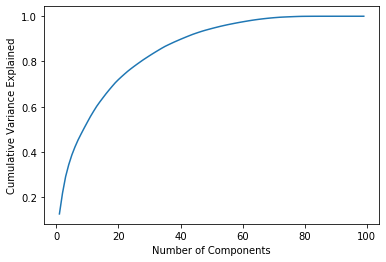

In [108]:

# Ploting components vs cummulative variance expianed
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(y=var_cumulative, x=range(1,len(var_cumulative)+1))
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.show()

In [109]:
round(var_cumulative[50], 2)

0.95

Here we can see, with only 50 components we can get 95% of information

In [110]:
# PCA with 50 components
pca = IncrementalPCA(n_components=50)
new_data = pca.fit_transform(X_train)
new_data.shape

(20985, 50)

In [111]:
X_train_pca = pd.DataFrame(new_data, columns=list(map(lambda x : f'PC {x}', range(1,51))))
X_train_pca.head()

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0  1.049821  2.409608 -2.199584 -1.164866  1.086971 -1.460841 -1.392527   
1 -1.441856 -1.826119 -0.537192  0.523763  0.513630 -0.057761  0.805458   
2 -0.796388 -2.149819 -0.369405  0.841830  0.382321 -0.205787  0.305614   
3 -2.460372 -0.960691  1.874623  0.568412  0.526541  1.047499  0.739670   
4 -0.846187  3.396655 -7.182499  2.366733  0.302523  3.267186  3.241778   

       PC 8      PC 9     PC 10  ...     PC 41     PC 42     PC 43     PC 44  \
0  2.978648  2.486760  0.147653  ... -0.105398  0.045160  0.113957  0.520552   
1 -1.318719 -0.495518 -0.720347  ...  0.111993  0.002117 -0.140177 -0.060202   
2 -0.702547 -0.120851 -1.369889  ...  0.847391  0.180282  0.435848 -0.341588   
3 -0.315777 -1.312805 -1.306522  ... -0.714268  0.288217 -0.630521  0.520366   
4 -1.334378 -4.370436  0.509773  ... -0.594505 -1.187934  0.451731 -0.957397   

      PC 45     PC 46     PC 47     PC 48     PC 49     PC 50  
0 -1.205967  1.565458  0.715989 -0.135672  0.257718  0.593878  
1  0.057282  0.084910 -0.207072 -0.035718  0.387163 -0.036536  
2 -0.082162  0.113717 -0.079006 -0.193857 -0.494845  0.313151  
3 -0.297014  0.026387  0.327021  0.090270  0.094745  0.047330  
4 -0.355466 -0.579259  1.047918  0.556043 -0.126443  0.145860  

[5 rows x 50 columns]

In [152]:
new_test_data = pca.transform(X_test)
X_test_pca = pd.DataFrame(new_test_data, columns=list(map(lambda x : f'PC {x}', range(1,51))))
X_test_pca.head()

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0  6.452778  6.235761 -0.292695 -0.464893 -3.037767 -1.265811  2.181599   
1 -1.715446 -1.641482 -1.085130  0.232531 -0.637839 -0.045758  0.258890   
2  0.560073 -2.295203 -1.358652 -0.634784 -0.606636  0.055500 -0.781034   
3 -1.657686 -2.335944 -1.392211 -1.333997 -0.550416 -0.410854 -0.285321   
4 -2.467707 -1.754572  0.958405 -0.246071  0.926807  0.678497  0.959547   

       PC 8      PC 9     PC 10  ...     PC 41     PC 42     PC 43     PC 44  \
0 -0.441602  1.334225  1.073967  ...  0.988086  1.433361 -0.217369  1.403806   
1 -0.254865 -0.216273 -0.747806  ...  0.052803 -0.397947  0.538390 -0.449379   
2  2.408428 -0.420880 -0.162393  ...  0.577515 -0.001443  0.033275 -0.124823   
3 -0.579418  0.486839 -0.047260  ...  0.130973 -0.322955 -0.427361  0.116361   
4 -0.265165 -0.225951 -0.368863  ... -1.448990  0.332034 -0.563626  0.413505   

      PC 45     PC 46     PC 47     PC 48     PC 49     PC 50  
0 -0.276004  0.207556  0.227950  0.528213 -0.069228 -0.285625  
1  0.041113 -0.253873  0.158519 -0.091274  0.287268 -0.076880  
2 -0.036555  0.018854 -0.037913  0.421575  0.013859  0.175280  
3  0.020826 -0.247067 -0.314562 -0.076143 -0.002711 -0.185283  
4 -0.160065 -0.197335  0.117300  0.052404 -0.019238 -0.077794  

[5 rows x 50 columns]

## Decision Tree

In [112]:
from sklearn .tree import DecisionTreeClassifier
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [143]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 25, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   53.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [144]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.946999      0.033370         0.000693        0.000980   
1        0.908287      0.017095         0.003378        0.003415   
2        0.830533      0.021437         0.006064        0.004369   
3        0.888656      0.008952         0.008741        0.000956   
4        0.977885      0.050107         0.000685        0.000968   
5        0.966984      0.056755         0.000000        0.000000   
6        0.834923      0.025941         0.002694        0.003810   
7        0.834353      0.021114         0.005379        0.003804   
8        0.927609      0.033597         0.007424        0.003749   
9        0.919614      0.022650         0.004733        0.003801   
10       0.826764      0.021818         0.006055        0.004361   
11       0.827767      0.023935         0.006756        0.003406   
12       0.604216      0.004400         0.003381        0.003429   
13       0.604860      0.004744         0.000694        0.000981   
14       0.531115      0.020126         0.006753        0.004775   
15       0.534506      0.024544         0.002694        0.003810   
16       0.611529      0.004865         0.000000        0.000000   
17       0.620987      0.016735         0.005355        0.003786   
18       0.542259      0.021516         0.001386        0.000980   
19       0.534177      0.018214         0.002693        0.003809   
20       0.607708      0.008257         0.004063        0.004375   
21       0.605138      0.005391         0.005389        0.003811   
22       0.536728      0.020561         0.000693        0.000980   
23       0.531144      0.020082         0.002678        0.003787   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy              10                     50   
1          entropy              10                     50   
2          entropy              10                    100   
3          entropy              10                    100   
4          entropy              15                     50   
5          entropy              15                     50   
6          entropy              15                    100   
7          entropy              15                    100   
8          entropy              20                     50   
9          entropy              20                     50   
10         entropy              20                    100   
11         entropy              20                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   
16            gini              15                     50   
17            gini              15                     50   
18            gini              15                    100   
19            gini              15                    100   
20            gini              20                     50   
21            gini              20                     50   
22            gini              20                    100   
23            gini              20                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
1                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
2                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
3                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
4                       50  {'criterion': 'entropy', 'max_depth': 15, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 15, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 15, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 15, 'min...   
8                       50  {'criterion': 'entro

In [146]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8032404098165357
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### Running the model with best parameters obtained from grid search

In [147]:
# model with optimal hyperparameters
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [148]:
# accuracy score
clf.score(X_train_pca, y_train)

0.8364546104360258

In [149]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

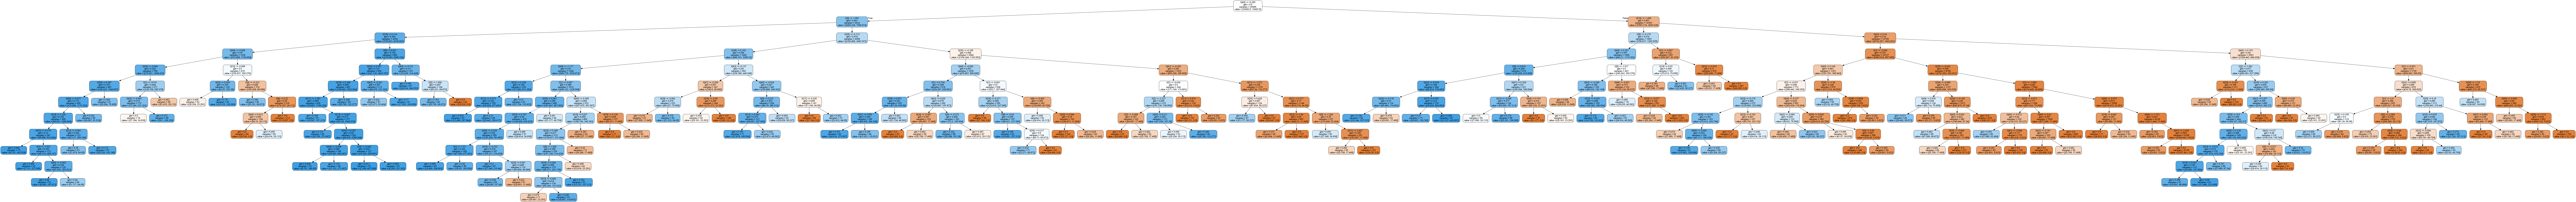

In [150]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf, out_file=dot_data,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Making prediction on Test s 

In [156]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8207
           1       0.28      0.75      0.40       787

    accuracy                           0.81      8994
   macro avg       0.62      0.78      0.64      8994
weighted avg       0.91      0.81      0.84      8994



In [157]:
print(confusion_matrix(y_test,y_pred))

[[6659 1548]
 [ 197  590]]


## Random Forset

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# fit
rfc.fit(X_train,y_train)

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

In [ ]:
print(accuracy_score(y_test,predictions))